Jacob Masur and Daniel Cohen

Internet Access in Orleans Parish
===========================

## Introduction

This webpage \([https://jnmasur.github.io/index.html](https://jnmasur.github.io/index.html)\) was created by Jacob Masur and Daniel Cohen to investigate the distribution of internet access in Orleans Parish across geographic regions. This is extremely important to consider in our modern computer-based society in which increasingly many common resources and tasks are placed online. This is especially relevant in the time of a global pandemic where, in the name of safety, many workplaces and schools have converted to strictly virtual environments. In addition, many vital resources are now most easily accessed through the internet such as [FEMA assistance for Hurricane Ida](https://www.fema.gov/disaster/hurricane-ida).

Increased virtualization can be beneficial as it provides safer and more convenient access to necessary resources, but access to internet requires owning some device that can connect to the internet and payment for an internet service plan. The cost of paying for internet access can be extremely burdensome for families whose children must complete many homework assignments and even full school days strictly online. This poses a massive risk of strengthening the [cycle of poverty](https://www.worldvision.ca/stories/child-sponsorship/what-is-the-cycle-of-poverty) where children born in poor families lacking internet access [struggle more than other students in school](https://www.pewtrusts.org/en/trust/archive/summer-2019/americas-digital-divide) due to lack of internet access and then [struggle to make sufficient money later in life](https://www.bls.gov/emp/chart-unemployment-earnings-education.htm) to pay for internet access for their children. In addition, this could increase the extremely harmful effects of [systemic racism](https://www.vox.com/2020/6/17/21284527/systemic-racism-black-americans-9-charts-explained) which has already placed black Americans and other minorities at an extreme disadvantage financially and in other ways.

Given the clear issues caused by lack of internet access, in our project, our primary goal is to answer the questions:
1. **How accessible is internet to residents of Orleans Parish in their homes?**
2. **Are public internet access points distributed in a manner that optimizes access to those who lack access in their homes?**

Our secondary goals are to confirm the factors we believe will most strongly impact access to internet in New Orleans:
- Income level
- Race
- Level of education

We will investigate these problems by looking at the geographic distribution of internet access by census tract and the distribution of locations for free publicly accessible internet access \(for example, public libraries\) in Orleans Parish. Additionally, we will investigate correlations between wifi access and demographic information such as income level, educational attainment, and ethnicity. We predict that income level will have a significant impact on access to internet. In general, people with higher level of eduction also make more money, and since [income is inequally distributed amongst different races](https://www.federalreserve.gov/econres/notes/feds-notes/disparities-in-wealth-by-race-and-ethnicity-in-the-2019-survey-of-consumer-finances-20200928.htm), there will likely be a dependence on educational attainment and race. Moreover, since wealthier areas pay higher taxes and usually [have better public infrastructure](https://www.brookings.edu/blog/the-avenue/2018/05/09/can-people-afford-american-infrastructure/), we predict that free internet access points will be located in areas in which most people already have access to internet.

### Installs and Imports

Here we simply install and import the necessary libraries and functions that we will use for our investigation.

In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install scipy
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install geopandas
!pip3 install shapely
!pip3 install rtree

In [200]:
# useful libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from sklearn.metrics import pairwise_distances
from scipy.stats import linregress
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt
import rtree

## Data Overview

For our investigation, we will be using seven distinct data sets. The first one contains census tract level information reagrding the type and precense of internet and computers by household for census tracts across the entire country and is provided by [NHGIS](https://www.nhgis.org/). We also obtained 3 other data sets from NHGIS, one providing the racial makeup by census tract, one detailing educational attainment for people 25 years of age or older by census tract, and one containing the median household income also by census tract. The final data set sourced via NHGIS is the data set that provides the population of each census tract. All aforementioned data is the result of the [American Community Survey](https://www.census.gov/data/developers/data-sets/acs-5year.html) which is conducted by the Census Bureau and is therefore a trustworthy source. All datasets sourced from NHGIS contain country-wide data, and most contain many variables that are irrelevant to our discussion, so cleaning these sets is essential. The sixth data set contains geographic information for locations with free publicly accessible internet in Orleans Parish. This data comes from the [official New Orleans Database](https://data.nola.gov/) which is also a very trustworthy source. The final data set is directly sourced from the [US Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) and contains shape files for Louisiana census tracts necessary for performing geographic plotting. All data sets come from official government sources, so we believe that this data is accurate and will provide a good representation of internet access by race, income, and educational attainment.

## NHGIS Internet Data

The first data sets we will consider is sourced from NHGIS, it contains census tract data on the type of computers and the precense and types of internet subscriptions in households for the entire country. This data frame is therefore extremely large.

In [94]:
# load the internet access data set
internet = pd.read_csv("./data/internet_data.csv")
internet.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,AIQBM004,AIQBM005,AIQBM006,AIQBM007,AIQBM008,AIQBM009,AIQBM010,AIQBM011,AIQBM012,AIQBM013
0,G0100010020100,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,71,69,36,75,61,30,8,11,8,50
1,G0100010020200,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,85,80,52,85,51,20,10,11,24,82
2,G0100010020300,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,129,107,81,129,86,57,17,11,14,108
3,G0100010020400,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,160,142,78,158,107,61,11,11,25,126
4,G0100010020500,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,372,362,174,434,200,92,45,16,148,183


Source:  
Steven Manson, Jonathan Schroeder, David Van Riper, Tracy Kugler, and Steven Ruggles.  
IPUMS National Historical Geographic Information System: Version 16.0  
2017 American Community Survey: 5-Year Data \[2013-2017, Tracts & Larger Areas\]. Minneapolis, MN: IPUMS. 2021.  
[http://doi.org/10.18128/D050.V16.0](http://doi.org/10.18128/D050.V16.0)

### Cleaning the Data Set

The data set at this point contains a lot of data that is irrelevant to our investigation; we will therefore need to clean the data set, so that it becomes usable. Since we are only interested in Orleans Parish data, we filter the dataset accordingly.

In [95]:
internet = internet[(internet["STATE"] == "Louisiana") & (internet["COUNTY"] == "Orleans Parish")]
internet.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,AIQBM004,AIQBM005,AIQBM006,AIQBM007,AIQBM008,AIQBM009,AIQBM010,AIQBM011,AIQBM012,AIQBM013
28917,G2200710000100,2013-2017,NaN,NaN,Louisiana,22,Orleans Parish,71,NaN,NaN,...,155,144,75,145,129,79,12,12,34,87
28918,G2200710000200,2013-2017,NaN,NaN,Louisiana,22,Orleans Parish,71,NaN,NaN,...,79,42,11,79,72,6,12,12,45,47
28919,G2200710000300,2013-2017,NaN,NaN,Louisiana,22,Orleans Parish,71,NaN,NaN,...,56,51,41,46,33,15,9,12,10,68
28920,G2200710000400,2013-2017,NaN,NaN,Louisiana,22,Orleans Parish,71,NaN,NaN,...,80,61,43,62,61,34,29,12,38,84
28921,G2200710000601,2013-2017,NaN,NaN,Louisiana,22,Orleans Parish,71,NaN,NaN,...,43,34,9,43,31,7,12,12,14,71


There is still much extraneous data contained in this table, and we certainly will not be able to investigate 84 variables. In the next cell, we reduce our consideration to 3 variables: the census tract, the total households surveyed, the number of households without internet access.

In [96]:
df_internet = internet[["TRACTA", "AIQAE001", "AIQBE013"]]

The definition of these columns can be found in the data folder on our github. Here we rename the columns according to their definitions, so the column labels provide useful information.

In [97]:
df_internet = df_internet.rename(columns={"TRACTA": "Census Tract", "AIQAE001":"Total", "AIQBE013":"No Internet"})

For future analysis, it is also useful to have the number of households with internet access, so we calculate this by subtracting the number of households without internet access from the number of households with internet access.

In [98]:
df_internet["Has Internet"] = df_internet["Total"] - df_internet["No Internet"]

Now, since each observation in the data frame is a census tract, this value is unique, and works well as an index.

In [99]:
df_internet.set_index("Census Tract", inplace=True)

Some census tracts contain no data, we would like to remove these so we filter out any row in which the total households surveyed is 0.

In [100]:
df_internet = df_internet[df_internet["Total"] > 0]

In [101]:
df_internet.head()

,Total,No Internet,Has Internet
Census Tract,,,
100,1404,204,1200
200,487,192,295
300,525,315,210
400,854,408,446
601,384,305,79


At this point, data across census tracts is difficult to compare since the total households vary significantly. Therefore, we find the proportion of households with the property described by each variable.

In [102]:
internet_proportions = df_internet.drop(columns=["Total"]).divide(df_internet["Total"], axis=0)
internet_proportions.head()

,No Internet,Has Internet
Census Tract,,
100,0.145299,0.854701
200,0.394251,0.605749
300,0.600000,0.400000
400,0.477752,0.522248
601,0.794271,0.205729


## Publicly Accessible Internet
There are some locations throughout Orleans Parish that provide free access to internet for the public. It will be interesting to investigate the location of these relative to census tracts, especially those in which a small proportion of the population has access to the internet.

In [103]:
free = pd.read_csv("./data/ComputerResources_data.csv")

In [104]:
free.head()

,the_geom,ObjectID,Location,Address,Zip Code,Phone,Hours,Sunday Hours,Computers,Kids PC Area,...,WiFi,Printing,Support Available,Support Type,Restrictions,Device Rental Program,Device Rental Type,Device Rental Requirements,Device Rental Restrictions,Classes Available
0,POINT (-90.101872057386 29.97491327785),7,Mid-City Branch,4140 Canal Street,70119,(504) 596-2654,"10 a.m. - 8 p.m., Mon.- Thurs.\n10 a.m. - 5 p....",No,12.0,No,...,Yes,Yes,Yes,Limited,NaN,Yes,iPad,18+,In-House Only,None
1,POINT (-90.013800108486 29.966383690636),6,Martin Luther King Branch,1611 Caffin Avenue,70117,(504) 596-2695,"10 a.m. - 8 p.m., Mon. - Thurs.\n10 a.m. - 5 p...",No,12.0,No,...,Yes,Yes,Yes,Partial,NaN,Yes,iPad,18+,In-House Only,Basic Computing
2,POINT (-90.013637780585 29.922729858452),9,Algiers Regional Branch,3014 Holiday Drive,70131,(504) 596-2641,"10 a.m. - 8 p.m., Mon.- Thurs.\n10 a.m. - 5 p....",Yes,46.0,Yes,...,Yes,Yes,Yes,Full-Time,NaN,Yes,iPad,18+,In-House Only,None
3,POINT (-90.101057739914 29.921354322638),2,Children's Resource Center,913 Napoleon Avenue,70115,(504) 596-2628,"10 a.m. – 8 p.m., Mon. - Thu.\n10 a.m. - 5 p.m...",No,5.0,No,...,Yes,Yes,Yes,As Needed,NaN,Yes,iPad,18+,In-House Only,None
4,POINT (-90.107558120658 30.004961193384),14,Robert E. Smith Branch,6301 Canal Blvd,70124,(504) 596-2638,10 a.m. - 8 p.m Mon-Thurs. \n10 a.m. - 5 p.m F...,Yes,21.0,Yes,...,Yes,Yes,Yes,Full-Time,NaN,Yes,iPad,18+,In-House Only,None


Source:  
City of New Orleans Open Data.  
[https://data.nola.gov/Health-Education-and-Social-Services/ComputerResources/vaaq-p3ar](https://data.nola.gov/Health-Education-and-Social-Services/ComputerResources/vaaq-p3ar).

We would only like the locations that provide access to internet, so we filter out all the ones that do not. Additionally, we only are interested in the location of these public internet resources, so we keep the longitude and latitude.

In [105]:
free = free[free["Internet"] == "Yes"]
# obtain the latitude and longitude using a regex
temp = free["the_geom"].str.extract(r"(-\d{2}\.\d+)\w\s(\d{2}\.\d+)")

In [106]:
free["lon"] = pd.to_numeric(temp[0])
free["lat"] = pd.to_numeric(temp[1])

In [107]:
free = free[["lon", "lat"]]

In [108]:
free.head()

,lon,lat
0,-90.101872,29.974913
1,-90.013800,29.966384
2,-90.013638,29.922730
3,-90.101058,29.921354
4,-90.107558,30.004961


We now create a geographic data frame using GeoPandas which will allow us to create a geographic plot in our future analysis.

In [109]:
geo_free = gpd.GeoDataFrame(free)

In [110]:
# create a geometry column containing Point objects which will allow for plotting
geo_free["geom"] = geo_free.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
geo_free = geo_free.set_geometry("geom")
geo_free.head()

,lon,lat,geom
0,-90.101872,29.974913,POINT (-90.10187 29.97491)
1,-90.013800,29.966384,POINT (-90.01380 29.96638)
2,-90.013638,29.922730,POINT (-90.01364 29.92273)
3,-90.101058,29.921354,POINT (-90.10106 29.92135)
4,-90.107558,30.004961,POINT (-90.10756 30.00496)


## Race, Income, and Education Data

Our secondary goal is to evauluate the impact of racial makeup, income, and educational attainment by census tract on access to internet in that census tract. In order to do this, we load another data set sourced from NHGIS which contains information for the racial makeup of each census tract, the educational attainment for residents 25 years of age or older by census tract, and the median household income by census tract.

In [111]:
rci = pd.read_csv("./data/race_education_income.csv", encoding="ISO-8859-1")
rci.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,AH04E017,AH04E018,AH04E019,AH04E020,AH04E021,AH04E022,AH04E023,AH04E024,AH04E025,AH1PE001
0,G0100010020100,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,282,88,34,184,77,261,142,45,28,67826.0
1,G0100010020200,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,495,90,91,182,106,166,51,16,5,41287.0
2,G0100010020300,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,724,114,161,446,146,232,150,20,19,46806.0
3,G0100010020400,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,873,208,249,291,250,540,156,38,57,55895.0
4,G0100010020500,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,1331,264,439,1033,587,1446,1037,197,87,68143.0


Source:  
Steven Manson, Jonathan Schroeder, David Van Riper, Tracy Kugler, and Steven Ruggles.  
IPUMS National Historical Geographic Information System: Version 16.0  
2017 American Community Survey: 5-Year Data \[2013-2017, Tracts & Larger Areas\]. Minneapolis, MN: IPUMS. 2021.  
[http://doi.org/10.18128/D050.V16.0](http://doi.org/10.18128/D050.V16.0)

Again, this data set contains country-wide data, and we would like to restrict our consideration to Orleans Parish.

In [112]:
# filter out everywhere besides orleans parish
rci = rci[(rci["STATE"] == "Louisiana") & (rci["COUNTY"] == "Orleans Parish")]

### Race Dataset
We would like to separate this large data set into three different data sets for race, income, and educational attainment. For the race data set, we select census tract and all the race information collected in the survey. Once again, the definition of the variables is located in the data folder on github, so we rename the columns to useful labels.

In [113]:
race = rci[["TRACTA", "AHY2E001", "AHY2E002", "AHY2E003", "AHY2E004", "AHY2E005", "AHY2E006", "AHY2E007", 
            "AHY2E008"]]
race = race.rename(columns={"TRACTA":"Census Tract", "AHY2E001":"Total", "AHY2E002":"White", "AHY2E003":"Black", 
                            "AHY2E004":"Native American", "AHY2E005":"Asian", "AHY2E006":"Pacific Islander", 
                            "AHY2E007":"Other", "AHY2E008":">= 2 Races"})
race.set_index("Census Tract", inplace=True)
race = race[race["Total"] > 0]

For the purposes of our study, it is more informatative to consider fewer variables, and therefore we will only consider the white population and the non-white population.

In [114]:
race["Non-White"] = race[["Black", "Native American", "Asian", "Pacific Islander", "Other", 
                          ">= 2 Races"]].sum(axis=1)

In [115]:
race = race.drop(columns=["Black", "Native American", "Asian", "Pacific Islander", "Other", ">= 2 Races"])
race.head()

,Total,White,Non-White
Census Tract,,,
100,2811,2574,237
200,1513,206,1307
300,1228,127,1101
400,2034,311,1723
601,1037,28,1009


It will be easier to compare observations if we obtain the proportion of each race by census tract which we do below.

In [116]:
race_proportions = race.drop(columns=["Total"]).divide(race["Total"], axis=0)
race_proportions.head()

,White,Non-White
Census Tract,,
100,0.915688,0.084312
200,0.136153,0.863847
300,0.103420,0.896580
400,0.152901,0.847099
601,0.027001,0.972999


### Education Dataset
Now, we create a new data frame containing all information regarding educational attainment by census tract.

In [117]:
education = rci[["TRACTA", "AH04E001", "AH04E002", "AH04E003", "AH04E004", "AH04E005", "AH04E006", "AH04E007",
                 "AH04E008", "AH04E009", "AH04E010", "AH04E011", "AH04E012", "AH04E013", "AH04E014", "AH04E015",
                 "AH04E016", "AH04E017", "AH04E018", "AH04E019", "AH04E020", "AH04E021", "AH04E022", "AH04E023",
                 "AH04E024", "AH04E025"]].copy()

The education data set contains a lot of information that is not particularly useful. For example, there are variables for completion of each grade up to $12^{\text{th}}$ which we group into no high school education. We group all information into 2 columns, the population who did not complete high school, and the population that did complete high school.

In [118]:
# group all variables corresponding to an incomplete high school education
education["No High School"] = education[["AH04E002", "AH04E003", "AH04E004", "AH04E005", "AH04E006", "AH04E007", 
                                         "AH04E008", "AH04E009", "AH04E010", "AH04E011", "AH04E012", "AH04E013", 
                                         "AH04E014", "AH04E015", "AH04E016"]].sum(axis=1)
# group all variables corresponding to a high school degree, GED, or above
education["High School or Above"] = education[["AH04E017", "AH04E018", "AH04E019", "AH04E020", "AH04E021",
                                              "AH04E022", "AH04E023", "AH04E024", "AH04E025"]].sum(axis=1)
# drop all columns that we have grouped
education = education.drop(columns=["AH04E002", "AH04E003", "AH04E004", "AH04E005", "AH04E006", "AH04E007", 
                                    "AH04E008", "AH04E009", "AH04E010", "AH04E011", "AH04E012", "AH04E013", 
                                    "AH04E014", "AH04E015", "AH04E016", "AH04E017", "AH04E018", "AH04E019", 
                                    "AH04E020", "AH04E021", "AH04E022", "AH04E023", "AH04E024", "AH04E025"])
education = education.rename(columns={"TRACTA":"Census Tract", "AH04E001":"Total"})
education.set_index("Census Tract", inplace=True)

Again, there are census tracts that do not contain any information, so we filter out any row with zero total people surveyed.

In [119]:
education = education[education["Total"] > 0]
education.head()

,Total,No High School,High School or Above
Census Tract,,,
100,2278,65,2213
200,1070,298,772
300,949,120,829
400,1424,280,1144
601,691,351,340


In order to facilitate easier comparisons between census tracts, we obtain the proportions of each tract with no high school education and a high school education or more schooling.

In [120]:
education_proportions = education.drop(columns=["Total"]).divide(education["Total"], axis=0)
education_proportions.head()

,No High School,High School or Above
Census Tract,,
100,0.028534,0.971466
200,0.278505,0.721495
300,0.126449,0.873551
400,0.196629,0.803371
601,0.507959,0.492041


### Income Dataset
The income dataset contains very little information, it simply contains the the census tract number and the median household income for that census tract. The only cleaning we must perform on this dataframe is the removal of census tracts with no income information.

In [121]:
income = rci[["TRACTA","AH1PE001"]]

In [122]:
income = income.dropna()
income = income.rename(columns={"TRACTA":"Census Tract","AH1PE001":"Median Household Income"})
income.set_index("Census Tract", inplace=True)
income.head()

,Median Household Income
Census Tract,
100,70292.0
200,32467.0
300,26116.0
400,25565.0
601,13145.0


### Population Dataset
The population dataset is also the result of the American Community Surveyed and was obtained via [NHGIS](https://data2.nhgis.org/main). It will be useful to know the population of each tract because we are interested in discovering whether internet access is distributed well for the largest number of people who require it. The only relevant information in the population dataset is the tract number and the total population of the tract. Therefore, we remove all tracts that do not correspond to Orleans Parish and only select the relevant columns.

In [123]:
pop = pd.read_csv("./data/population.csv", encoding="ISO-8859-1")

In [124]:
pop = pop[(pop["STATE"] == "Louisiana") & (pop["COUNTY"] == "Orleans Parish")]

In [125]:
pop = pop[["TRACTA", "AHY1E001", "GISJOIN"]].rename(columns={"AHY1E001":"Population", 
                                                             "TRACTA":"Tract"}).set_index("Tract")

In [126]:
pop = pop[pop["Population"] > 0]
pop.head()

,Population,GISJOIN
Tract,,
100,2811,G2200710000100
200,1513,G2200710000200
300,1228,G2200710000300
400,2034,G2200710000400
601,1037,G2200710000601


## Geographic Data

In order to perform mapping of the census tracts, we require a shape file which gives the geometry of each census tract. This file is sourced from the [US Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html). The information contained in the data set covers all of Lousiana, so again we filter for Orleans Parish and only keep the relevant columns.

In [131]:
tracts = gpd.read_file("./data/tl_2017_22_tract/tl_2017_22_tract.shp")
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,22,055,001407,22055001407,14.07,Census Tract 14.07,G5020,S,6036812,0,+30.1760902,-092.0362245,"POLYGON ((-92.05387 30.16462, -92.05516 30.166..."
1,22,055,001500,22055001500,15,Census Tract 15,G5020,S,5452816,0,+30.1985322,-092.0283251,"POLYGON ((-92.05360 30.20157, -92.05345 30.201..."
2,22,055,001700,22055001700,17,Census Tract 17,G5020,S,5133690,0,+30.1792758,-092.0586651,"POLYGON ((-92.07449 30.17809, -92.07415 30.178..."
3,22,055,001902,22055001902,19.02,Census Tract 19.02,G5020,S,17033549,0,+30.2231859,-092.1082895,"POLYGON ((-92.14213 30.22526, -92.14212 30.225..."
4,22,055,001903,22055001903,19.03,Census Tract 19.03,G5020,S,15964885,0,+30.1963602,-092.1170561,"POLYGON ((-92.14198 30.20484, -92.14196 30.206..."


In [132]:
# get census tracts for orleans parish
optracts = tracts[tracts.COUNTYFP == "071"].copy()

We create a new column called standard tract which will allow us to integrate the geographic data with the other data sets. The last 5 numbers in GEOID correspond to the census tract number, while the first 6 digits correspond to the state and county codes.

In [133]:
optracts["standard_tract"] = optracts["GEOID"].str[-5:].astype(np.int64)

### Integrating Geographic Data

Now we integrate the geographic data set with the internet proportions data set and population data to facilitate future geographic plots of these variables. To begin, we create a new data frame by multiplying the proportion of the tract with no internet by the population of the tract to obtain the expected number of people in the tract with no access to internet.

In [148]:
internet_pop = pd.DataFrame({"No Internet": internet_proportions["No Internet"] * pop["Population"]})
internet_pop.dropna(inplace=True)

In [150]:
internet_pop.head()

,No Internet
100,408.435897
200,596.501027
300,736.800000
400,971.747073
601,823.658854


We can now merge this data frame with the geographic data on their census tract. We perform the default inner merge because we have dropped tracts previously that did not contain any internet data.

In [153]:
geo_internet = optracts.merge(internet_pop, left_on="standard_tract", right_index=True)

In [154]:
geo_internet.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,standard_tract,No Internet
51,22,071,007606,22071007606,76.06,Census Tract 76.06,G5020,S,1809500,459446,+30.0150744,-090.1180146,"POLYGON ((-90.12288 30.00092, -90.12272 30.002...",7606,315.289079
82,22,071,000617,22071000617,6.17,Census Tract 6.17,G5020,S,1226280,246068,+29.8974722,-089.9903933,"POLYGON ((-90.00206 29.89781, -90.00196 29.897...",617,1315.289522
142,22,071,001748,22071001748,17.48,Census Tract 17.48,G5020,S,2020069,0,+30.0254262,-089.9553984,"POLYGON ((-89.96895 30.02674, -89.96879 30.026...",1748,1370.077535
147,22,071,001747,22071001747,17.47,Census Tract 17.47,G5020,S,7166909,344000,+30.0414373,-089.9549478,"POLYGON ((-89.97631 30.03712, -89.97611 30.037...",1747,739.943190
148,22,071,001750,22071001750,17.50,Census Tract 17.50,G5020,S,1437946,166339,+30.0384832,-089.9176831,"POLYGON ((-89.93001 30.03690, -89.92982 30.036...",1750,1563.928571


## Exploratory Analysis and Data Visualization

### General Internet Distribution

An initial plot that is interesting to consider is the distribution of internet access by census tract. This will give an idea of how evenly distributed internet is across geographic regions of Orleans Parish, and help us answer our first question.

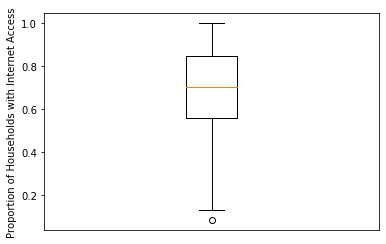

In [51]:
plt.boxplot(internet_proportions["Has Internet"])
plt.ylabel("Proportion of Households with Internet Access")
# xticks are not necessary since there is only one distribution
plt.xticks([])
plt.show()

In [52]:
internet_proportions["Has Internet"].describe()

count    172.000000
mean       0.686202
std        0.187571
min        0.084507
25%        0.556418
50%        0.703812
75%        0.846738
max        1.000000
Name: Has Internet, dtype: float64

The resulting distribution is skewed left meaning that there are many census tracts with a high proportion of households with internet access, and a few census tracts with a low proportion of households with internet access. These census tracts with a low proportion of households with internet access will be of great interest since these are the areas that clearly require improved infrastructure or other support. However, we can see that overall access to internet is distributed relatively well since the distribution is not extremely skewed (the mean and the median are close in value).

### Distribution of Public Internet Access

Now, we want to consider the distribution of publicly accessible internet. To do so, we calculate the distance matrix for all points in this graph, and plot the distances on a heat map.

In [252]:
distances = pairwise_distances(free[["lon", "lat"]], metric="euclidean")

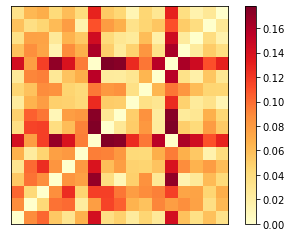

In [253]:
plt.imshow(distances, cmap="YlOrRd", origin="lower")
plt.colorbar()
# ticks are not necessary
plt.xticks([])
plt.yticks([])
plt.show()

In this heat map, each square represents a comparison of one location with publicly accessible internet to another, and the darker the color, the more distant the locations are. Based on this plot, it seems like there are two locations with free internet access far from most others, and the rest of the free internet locations are relatively close to each other.

### Correlations Between Demographic Information and Internet Access

Another important step in our analysis is to understand the correlations between all of the variables in consideration. To do so, we will merge all data sets and consider the variables for which we believe there might be a strong correlation.

In [53]:
# inner merge is necessary because there are not observations for the same tracts in each data frame
temp = internet_proportions.merge(race_proportions, how="inner", on="Census Tract")
temp = temp.merge(education_proportions, how="inner", on="Census Tract")
df_all = temp.merge(income, how="inner", on="Census Tract")

We can consider summarize most of the data simply considering the proportion of each tract with no internet, the proportion of the tract population that is white, the proportion with no high school education, and the median household income in each tract. Considering these variables also allows us to understand the correlations between other variables such as the proportion that does have internet, the proportion that is non-white, and the proportion with at least a high school diploma because these are all complements of the variables under explicit investigation.

In [54]:
df_all.corr()

,No Internet,Has Internet,White,Non-White,No High School,High School or Above,Median Household Income
No Internet,1.000000,-1.000000,-0.761323,0.761323,0.857278,-0.857278,-0.792468
Has Internet,-1.000000,1.000000,0.761323,-0.761323,-0.857278,0.857278,0.792468
White,-0.761323,0.761323,1.000000,-1.000000,-0.679351,0.679351,0.732181
Non-White,0.761323,-0.761323,-1.000000,1.000000,0.679351,-0.679351,-0.732181
No High School,0.857278,-0.857278,-0.679351,0.679351,1.000000,-1.000000,-0.664614
High School or Above,-0.857278,0.857278,0.679351,-0.679351,-1.000000,1.000000,0.664614
Median Household Income,-0.792468,0.792468,0.732181,-0.732181,-0.664614,0.664614,1.000000


This table contains a lot of very valuable information to our investigation. This correlation table indicates strong correlation between the proportion of a census tract with no internet and
- the proportion of the tract that is non-white ($r \approx 0.761$)
- the proportion of the tract that has no high school edution ($r \approx 0.857$)
- the median household income ($r \approx -0.792$)

We perform p tests to obtain the probability that we would obtain such a strong correlation given no correlation between the variables.

In [249]:
linregress(df_all["No High School"], df_all["No Internet"]).pvalue

1.3422181808874468e-50

In [250]:
linregress(df_all["Non-White"], df_all["No Internet"]).pvalue

1.2657108325988323e-33

In [251]:
linregress(df_all["Median Household Income"], df_all["No Internet"]).pvalue

3.9555090950779646e-38

These values are all incredibly low and clearly sufficient for us to reject the null hypothesis that there is no correlation between these variables. The extremely high correlation between education level and access to internet in individual's homes is evidence for the statement that a lack of internet access leads to overall worse academic performance, a statement which is further proven by this [study performed by researchers at OSU](https://extension.okstate.edu/fact-sheets/do-home-computers-internet-access-affect-student-performance.html).

It will be useful to visualize some of these relationships on a scatter plot:

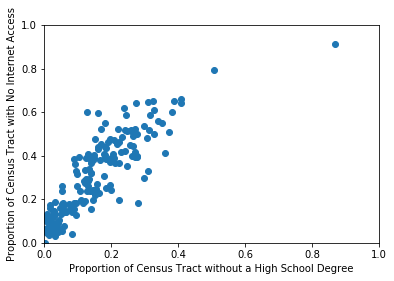

In [55]:
plt.scatter(df_all["No High School"], df_all["No Internet"])
plt.xlabel("Proportion of Census Tract without a High School Degree")
plt.ylabel("Proportion of Census Tract with No Internet Access")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

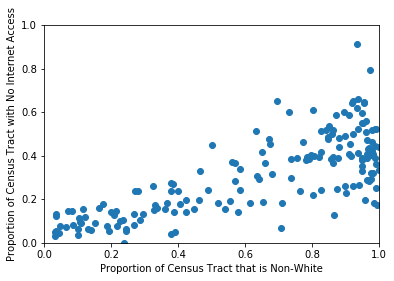

In [56]:
plt.scatter(df_all["Non-White"], df_all["No Internet"])
plt.xlabel("Proportion of Census Tract that is Non-White")
plt.ylabel("Proportion of Census Tract with No Internet Access")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In these plots, each point represents a census tract in Orleans Parish where the y-value is the proportion of the census tract with no internet access. The x-value in the first plot is the proportion of the census tract with no high school degree, and in the second plot the x-value is the proportion of the census tract that is non-white. Both plots allow us to visualize the strong correlations summarized by the correlation matrix.

## Final Results and Conclusion

With our final visualization, we would like to answer our two main questions regarding the distribution of internet in individual's homes in New Orleans, and the distribution of public internet access points. We plot each census tract and color it according to the expected number of people without access to internet in that tract, and we also plot the points with free public internet on top of this plot.

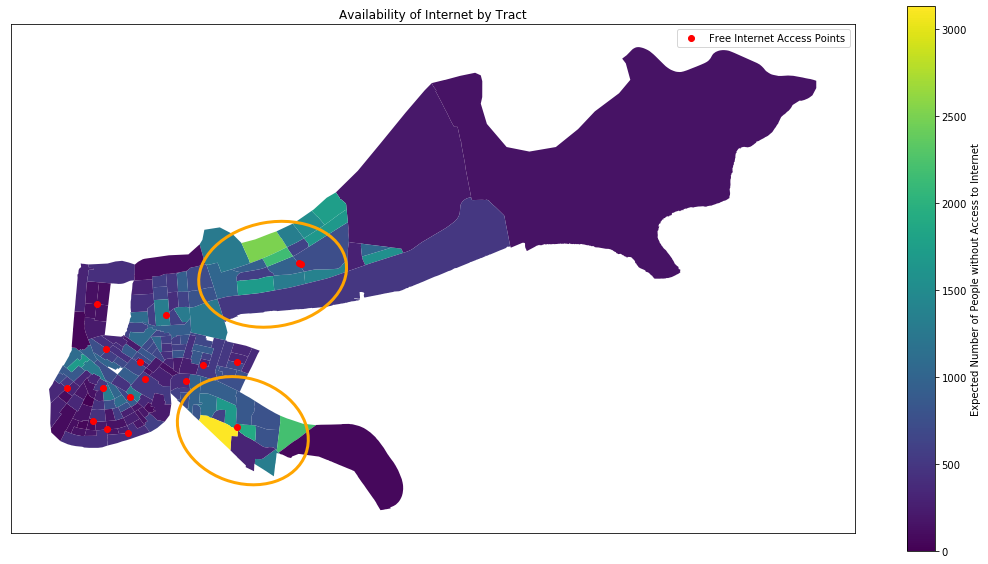

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(15,8), tight_layout=True)
ax.set_title("Availability of Internet by Tract")
# remove ticks and labels for appearances
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
geo_internet.plot("No Internet", ax=ax)
geo_free.plot(ax=ax, color="red", label="Free Internet Access Points")

# create the colorbar
norm = colors.Normalize(vmin=geo_internet["No Internet"].min(), vmax=geo_internet["No Internet"].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label("Expected Number of People without Access to Internet")
ax.legend()

e1 = patches.Ellipse((-89.99, 30.025), .1, .07, angle=10, fill=False, color="orange", linewidth=3)
ax.add_patch(e1)
e2 = patches.Ellipse((-90.01, 29.92), .09, .07, angle=-20, fill=False, color="orange", linewidth=3)
ax.add_patch(e2)

There is a lot to describe about this graph, but overall, it seems like internet is distributed reasonably equally in people's homes which is determined by only looking at the coloring of the census tract. There are many tracts colored in dark purple and in the intermediate green range. There are only a few tracts with a high expected number of people without access to internet. This is precisely what we expected based on the slightly left skewed distribution found in the previous section.

As for our second question, the plot seems to indicate that there is a lack of free public internet access points in the areas that require them the most. The two regions that enclosed in ellipses contain census tracts with the highest expected number of people without internet access, yet they have very few locations at which the public can access free internet. It is our recommendation that, were the city to spend more money on providing public internet access, more infrastructure be contructed in these areas to provide internet access to the people who need it the most.

### Reliability of Our Results

Now, we would like to give an idea of how accurate our conclusion is expected to be. The data sets from NHGIS report a margin of error. The first thing we would like to see is how reliable the survey that determined internet access is. We take the margins of error in the number of households without access to internet by tract, and plot this along with the measured value for the number of households. This will give us a qualitative indicator of whether our margins of error are low enough to accept the previous results.

In [245]:
moe = internet[["TRACTA", "AIQBE013", "AIQBM013"]].copy()

In [246]:
moe = moe.rename(columns={"AIQBE013":"No Internet", "AIQBM013":"MOE"}).set_index("TRACTA").sort_values(
    by="No Internet")

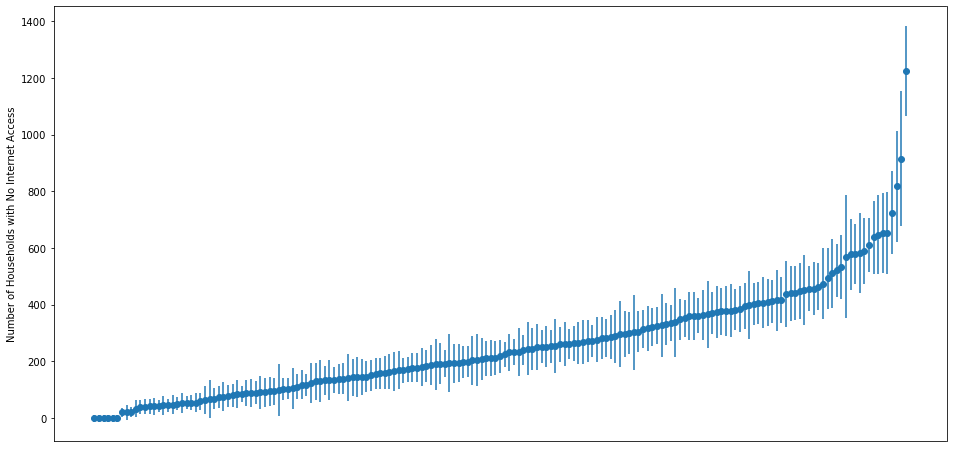

In [247]:
plt.figure(figsize=(16, 8))
# plot each tract an equal distance apart on the x-axis and the # of households with no internet on the x-axis
# along with the margin of error
plt.errorbar(list(range(len(moe))), moe["No Internet"], yerr=moe["MOE"], fmt="o")
plt.xticks([])
plt.ylabel("Number of Households with No Internet Access")
plt.show()

This plot effectively demonstrates that the margins of error in the number of households with no access to internet is not too large to reject the conclusions based on our previous plot. We belive that though our recommendation could change slightly, it would not change significantly as long as true population value is within the margin of error.

### Conclusion